## 1. 데이터셋 로드 & 전처리

In [1]:
from pandas import DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./usage_data.csv')
display(df.tail(3))

,datetime,temperature,humidity,usage
27661,2019-10-19 03:15:00,8.8,88.4,32.626
27662,2019-10-19 03:30:00,9.2,91.6,38.937
27663,2019-10-19 03:45:00,9.1,90.8,45.018


### 시각화를 통한 데이터 검수

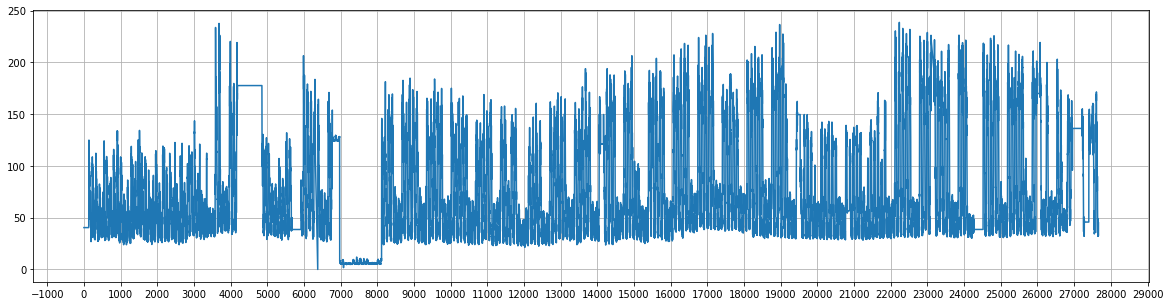

In [3]:
plt.rcParams["figure.figsize"] = (20,5)
ax = plt.subplot()
ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
plt.grid(True)
plt.plot(df.iloc[:,-1])

### 이상 구간 파악
* 같은 값이 반복되는 구간
* 너무 낮은 값을 갖는 구간

#### - 연속적으로 같은 값이 들어오는 구간 제외

In [4]:
df_cp = df.copy()
dff = df.copy()
drop_list = []

i = 0
while i< len(df_cp)-96:
    try:
        max_val = max(df_cp.usage[i:i+96])
        min_val = min(df_cp.usage[i:i+96])
        if max_val==min_val:
            print(f'* drop index : {i}~{i+95}')
            drop_list += [i for i in range(i, i+96)]
            i += 96
        else:
            i+=1
    except:
        print(f'error row:{i}')
        i += 1

* drop index : 0~95
* drop index : 4187~4282
* drop index : 4283~4378
* drop index : 4379~4474
* drop index : 4475~4570
* drop index : 4571~4666
* drop index : 4667~4762
* drop index : 5669~5764
* drop index : 5765~5860
* drop index : 24263~24358
* drop index : 24359~24454
* drop index : 26955~27050
* drop index : 27051~27146
* drop index : 27278~27373


#### - 값이 너무 낮은 구간(< 20) 제외

In [5]:
drop_list =  drop_list + list(df.loc[df.usage<20].index)

normal_list = [i for i in range(len(df)) if i not in drop_list]


#### - 전체 데이터 중 제거해야 할 이상구간 표시

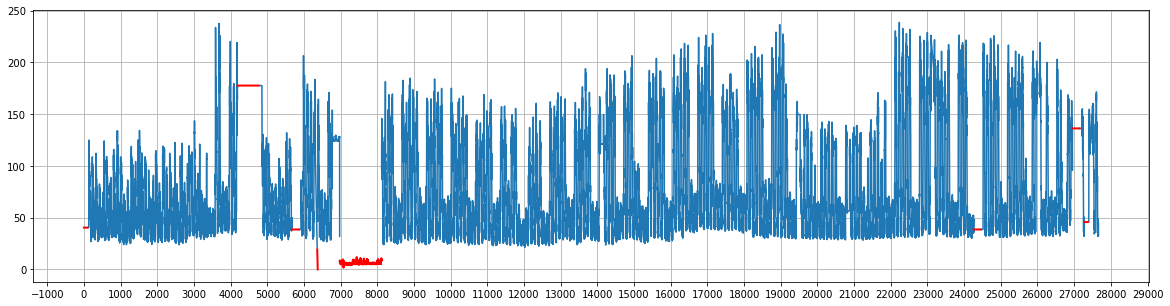

In [6]:
plt.rcParams["figure.figsize"] = (20,5)
ax = plt.subplot()
ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
plt.grid(True)


usage = df.iloc[:,-1]
abnm = usage.copy()
nm = usage.copy()

nm.loc[drop_list] = np.nan
abnm.iloc[normal_list] = np.nan

plt.plot(nm)
plt.plot(abnm, color='red', linewidth=2)

plt.show()



#### - 이상구간이 모두 제거되었는지 확인

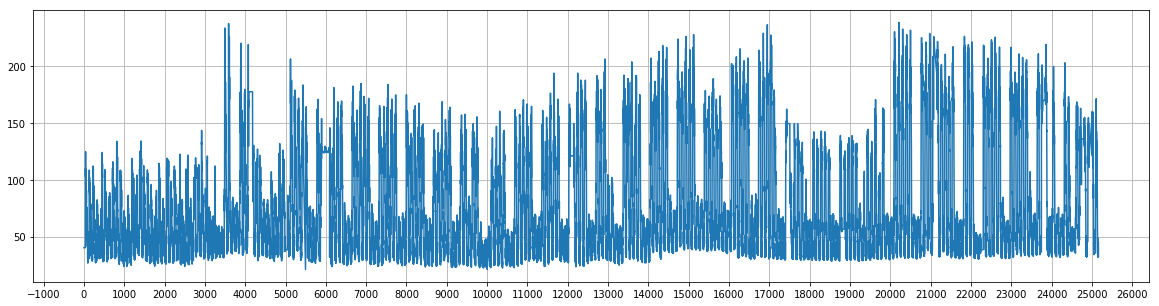

In [7]:
nm = nm.dropna()
nm = nm.reset_index(drop=True)

ax = plt.subplot()
ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
plt.grid(True)
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(nm)

In [8]:
print(f'{len(drop_list)} 개의 비정상 데이터 제거')

2501 개의 비정상 데이터 제거


### 전처리된 데이터셋 저장

In [9]:
df = df.drop(drop_list)
df = df.reset_index(drop=True)
len(df)

25163

In [10]:
df.to_csv('./trainval_data.csv', index=False)